In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test (1).csv')
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train_df.columns.values)
#PassengerId: Unique id munber to each passenger.
#Survived: Passenger survided (1) or died (0).
#Pclass: Passenger class.
#Name: Name of passenger.
#Sex: Gender of passenger.
#Age: Age of passenger.
#SibSp: Number of siblings/spouses.
#Parch: Number of parents/children.
#Ticket: Ticket number.
#Fare: Amount of money spent on ticket.
#Cabin: Cabin category.
#Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southhampton)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#Previewing the data to determine data types and column headers.
#The head command is used to output the first part of the file.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Previewing data continued
#The tail command will output of last part of the file.
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#display nulls in data within range
train_df.info()
print('#'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
# determine the number of null or missing values in each column for train set
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#determine the number of null or missing value in each column for test set
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#survival rate of pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

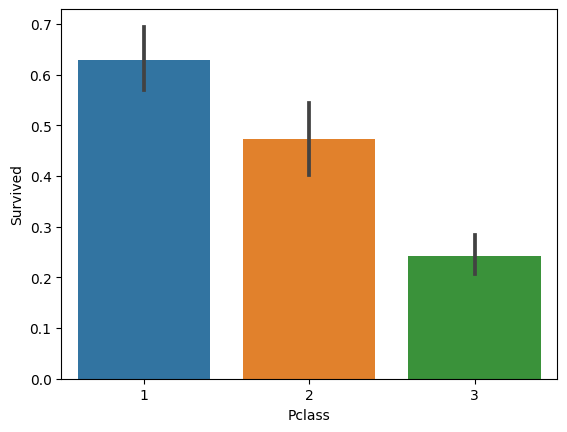

In [10]:
#visual representation of survival rate per Pclass
sns.barplot(x='Pclass',y='Survived',data=train_df)

In [11]:
#survival rate based on sex 1=Female, 0=Male
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

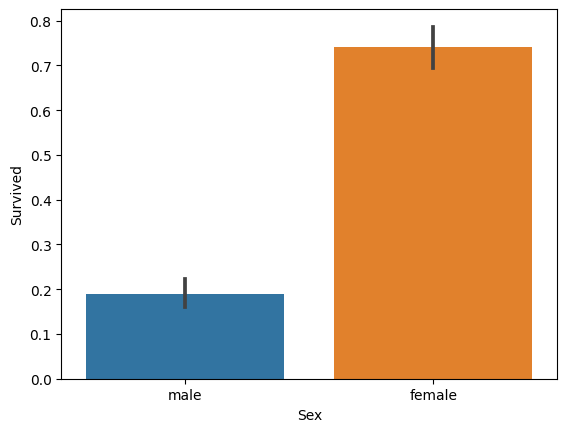

In [12]:
#Visual representation of survival rate
sns.barplot(x='Sex',y='Survived',data=train_df)

In [13]:
#normalization
for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#compute mean and standard dev of Age
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()

#number of NaN values (non number values)
num_na = train_df['Age'].isna().sum()

#generate random ages from mean and standard dev
random_vals = age_mean + age_std * np.random.randn(num_na)

#replace missing values with random_vals
train_df.loc[train_df['Age'].isna(), 'Age'] = random_vals

# convert to whole numbers
train_df['Age'] = train_df['Age'].astype(np.int64)

#view data to check work
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,38,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32,0,0,370376,7.75,NaN,Q


In [15]:
#Verify that missing values for age have been replaced.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#compute mean and standard dev of Age
age_mean = test_df['Age'].mean()
age_std = test_df['Age'].std()

#number of NaN values (non number values)
num_na = test_df['Age'].isna().sum()

#generate random ages from mean and standard dev
random_vals = age_mean + age_std * np.random.randn(num_na)

#replace missing values with random_vals
test_df.loc[test_df['Age'].isna(), 'Age'] = random_vals

# convert to whole numbers
test_df['Age'] = test_df['Age'].astype(np.int64)

#view data to check work
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,38,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",0,32,0,0,370376,7.75,NaN,Q


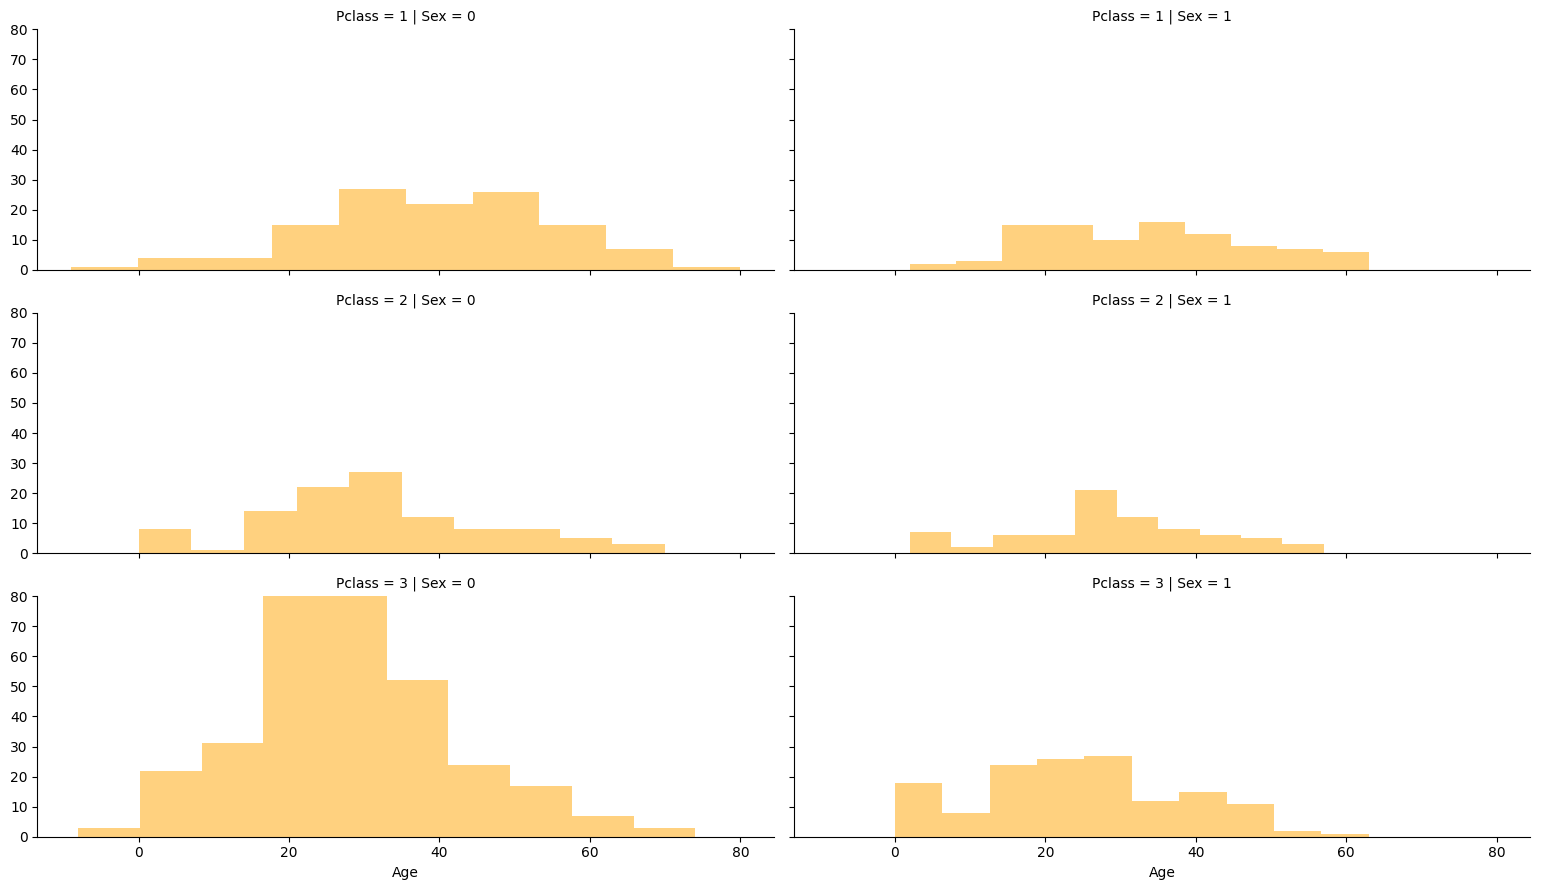

In [17]:
grid = sns.FacetGrid(train_df, row= 'Pclass', col= 'Sex',  aspect = 2.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=10, color= 'orange')
plt.ylim((0,80))
grid.add_legend()

In [18]:
train_df.info()
print('#'*10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.2+ KB
##########


In [19]:
#discover the most frequently used port
port = train_df.Embarked.dropna().mode()[0]
port

'S'

In [20]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                                as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
#convert categorical embarked feature to numeric
#this creates a unifying data type for analysis

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0


In [23]:
#convert Fare from float to int64
data = [train_df,test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Ticket', 'Cabin', 'Name',], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name',], axis=1)
combine = [train_df, test_df]
train_df.shape,test_df.shape

((891, 8), (418, 8))

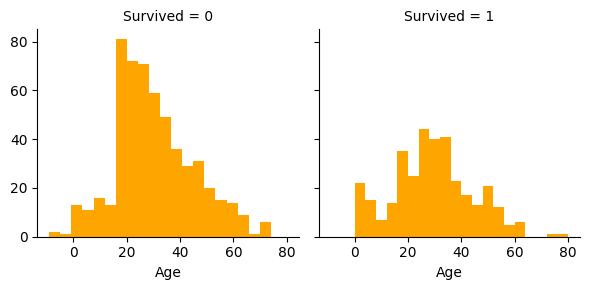

In [25]:
age_hist = sns.FacetGrid(train_df, col= 'Survived')
age_hist.map(plt.hist, 'Age', bins = 20, color = "Orange")

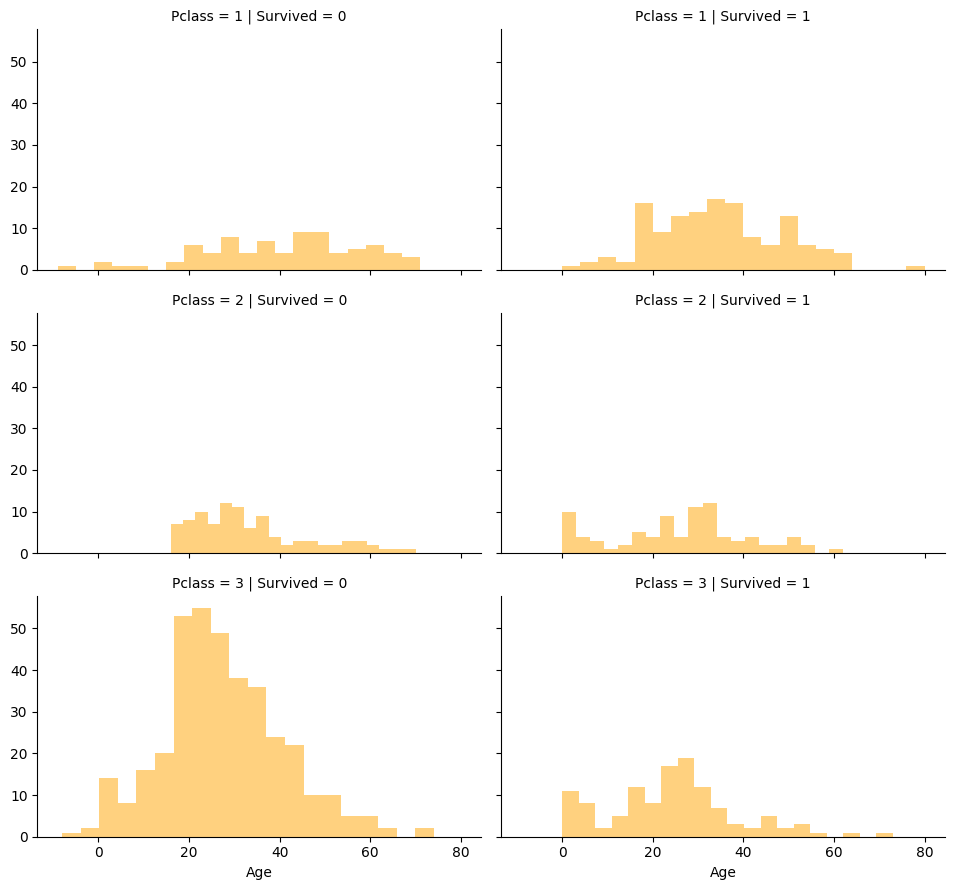

In [26]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass',  aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20, color = "Orange")
grid.add_legend();

C:\Users\farag\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\farag\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


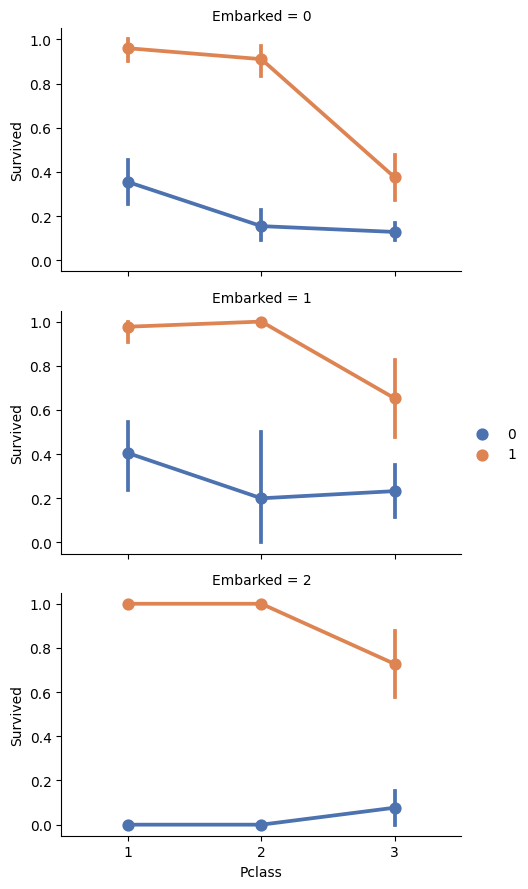

In [27]:
grid = sns.FacetGrid(train_df, row='Embarked',  aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int32
dtypes: int32(3), int64(5)
memory usage: 45.4 KB


In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int32
 7   Embarked     418 non-null    int32
dtypes: int32(3), int64(5)
memory usage: 21.4 KB


In [38]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
Y_test_passID = test_df["PassengerId"]
Y_test_passID

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predLR = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [32]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.97

In [36]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predRF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,2
1,3,1,47,1,0,7,0
2,2,0,62,0,0,9,2
3,3,0,27,0,0,8,0
4,3,1,22,1,1,12,0
...,...,...,...,...,...,...,...
413,3,0,28,0,0,8,0
414,1,1,39,0,0,108,1
415,3,0,38,0,0,7,0
416,3,0,21,0,0,8,0


In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.05

In [39]:
models = pd.DataFrame({
   'Model': ['KNN', 'Logistic Regression', 'Random Forest',  'Decision Tree'],
    'Score': [ acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
2,Random Forest,96.97
3,Decision Tree,96.97
0,KNN,83.05
1,Logistic Regression,79.80


In [43]:
data = {
  "PassengerID": Y_test_passID,
  "Survived": Y_predRF,
}

#load data into a DataFrame object:
ThePreditionRF = pd.DataFrame(data)
ThePreditionRF


,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [49]:
ThePreditionRF.to_csv('ThePreditionRF1.csv', index=False)